# Exploration des données du Bitcoin

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/home/legbedje/Documents/datascienceproject/predictionbitcoin/data/raw/BTC-USD.csv')

# Nettoyage des données
df['Date'] = pd.to_datetime(df['Date'])
df['Price'] = df['Price'].astype(str).str.replace(',', '').astype(float)
df['Open'] = df['Open'].astype(str).str.replace(',', '').astype(float)
df['High'] = df['High'].astype(str).str.replace(',', '').astype(float)
df['Low'] = df['Low'].astype(str).str.replace(',', '').astype(float)

# Nettoyage spécifique pour 'Vol.' et 'Change %'
df['Vol.'] = df['Vol.'].astype(str).str.replace('K', 'e3').str.replace('M', 'e6').str.replace(',', '')
df['Vol.'] = pd.to_numeric(df['Vol.'], errors='coerce')

df['Change %'] = df['Change %'].astype(str).str.replace('%', '')
df['Change %'] = pd.to_numeric(df['Change %'], errors='coerce')

# Renommer la colonne 'Price' en 'Close'
df = df.rename(columns={'Price': 'Close'})

# Trier les données par date
df = df.sort_values(by='Date')

## Afficher les premières lignes

In [10]:
df.head()

,Date,Close,Open,High,Low,Vol.,Change %
1720,2020-01-02,6967.0,7199.7,7209.6,6901.4,632780.0,-3.23
1719,2020-01-03,7343.1,6967.1,7402.9,6884.1,936290.0,5.40
1718,2020-01-04,7376.8,7345.1,7433.1,7291.4,523910.0,0.46
1717,2020-01-05,7372.5,7376.8,7501.0,7345.6,628140.0,-0.06
1716,2020-01-06,7759.1,7372.6,7783.1,7366.7,786750.0,5.24


## Informations sur le DataFrame

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1721 entries, 1720 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1721 non-null   datetime64[ns]
 1   Close     1721 non-null   float64       
 2   Open      1721 non-null   float64       
 3   High      1721 non-null   float64       
 4   Low       1721 non-null   float64       
 5   Vol.      1705 non-null   float64       
 6   Change %  1721 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 107.6 KB


## Statistiques descriptives

In [12]:
df.describe()

,Date,Close,Open,High,Low,Vol.,Change %
count,1721,1721.000000,1721.000000,1721.000000,1721.000000,1.705000e+03,1721.000000
mean,2022-05-10 23:59:59.999999744,33596.383672,33565.769378,34337.484834,32744.458512,1.270552e+07,0.184102
min,2020-01-02 00:00:00,4826.000000,4815.200000,5369.300000,3869.500000,2.600000e+02,-39.180000
25%,2021-03-07 00:00:00,19262.900000,19262.200000,19552.100000,18873.000000,5.902000e+04,-1.320000
50%,2022-05-11 00:00:00,30166.900000,30139.700000,30645.900000,29597.800000,1.019200e+05,0.050000
75%,2023-07-15 00:00:00,46859.000000,46855.700000,48118.800000,45602.100000,2.845700e+05,1.670000
max,2024-09-17 00:00:00,73066.300000,73066.700000,73740.900000,71338.400000,7.528400e+08,19.410000
std,NaN,18135.421437,18134.998044,18551.176727,17668.043277,7.614749e+07,3.447974


## Visualisation de l'évolution du prix de clôture

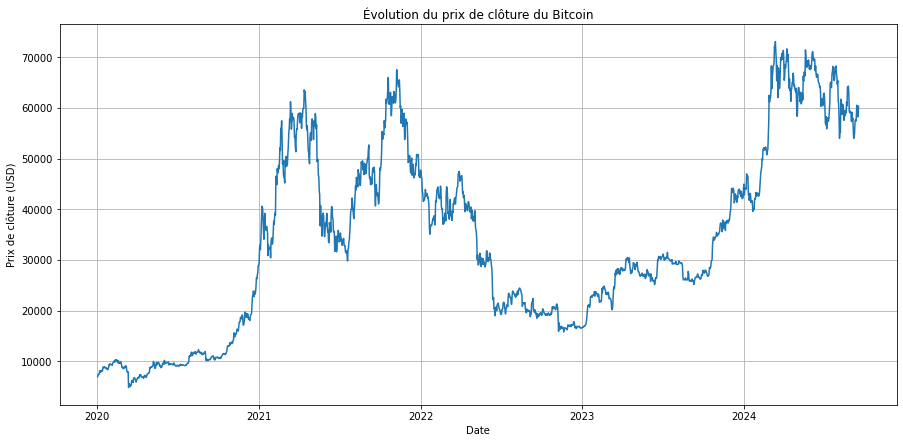

In [13]:
plt.figure(figsize=(15, 7))
plt.plot(df['Date'], df['Close'])
plt.title('Évolution du prix de clôture du Bitcoin')
plt.xlabel('Date')
plt.ylabel('Prix de clôture (USD)')
plt.grid(True)
plt.show()